In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA


In [5]:
import kagglehub
path = kagglehub.dataset_download("damlaerek0/telecust1000t")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Behbab\.cache\kagglehub\datasets\damlaerek0\telecust1000t\versions\1


In [6]:
df = pd.read_csv(r'\Users\Behbab\Datasets\teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
labels=df['custcat'].value_counts().index

In [8]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

<Axes: >

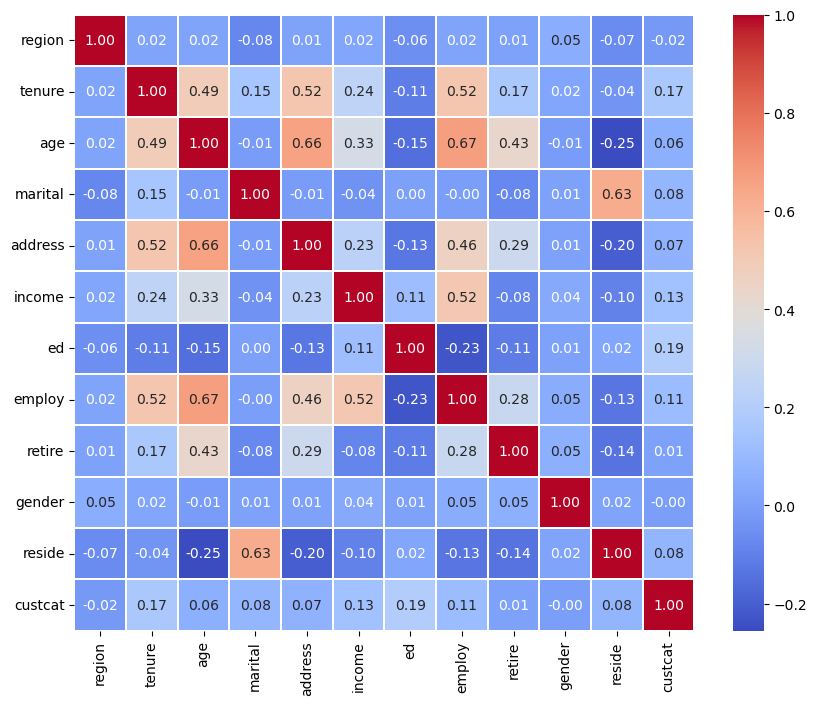

In [9]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2)

array([[<Axes: title={'center': 'income'}>]], dtype=object)

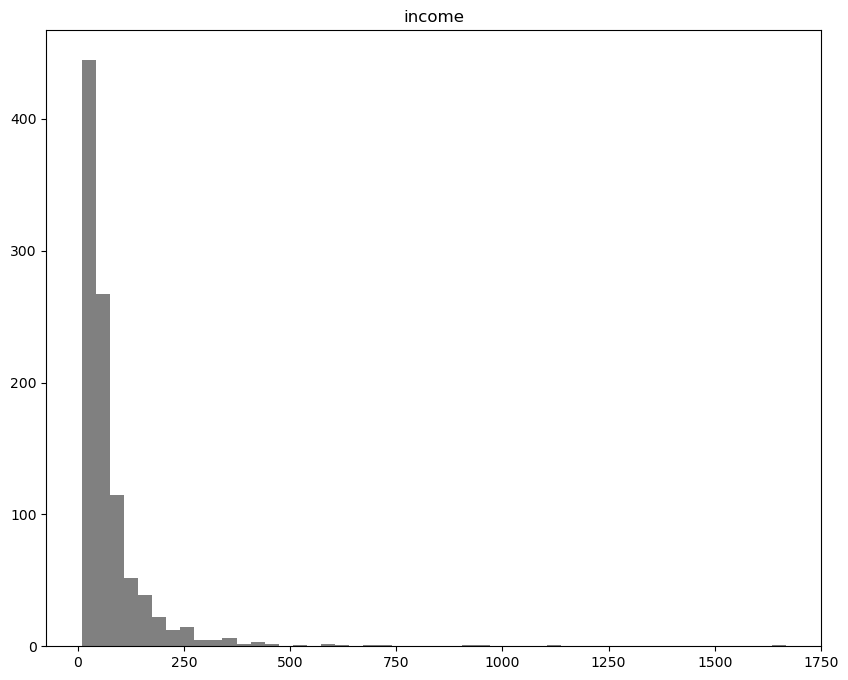

In [10]:
df.hist(column='income', bins=50, grid=False, color="grey", figsize=(10,8))

In [11]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].astype("float64")
y = df['custcat']

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [12]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
yhat = neigh.predict(X_test)
yhat_train = neigh.predict(X_train)
print("Train set Accuracy: ", accuracy_score(y_train, yhat_train))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.56875
Test set Accuracy:  0.315


In [14]:
k=11
ACC=[]
STD=[]

for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train,y_train)

    yhat = neigh.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    ACC.append(acc)
    st = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    STD.append(st)

ACC, STD

([0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34, 0.33],
 [0.0324037034920393,
  0.03208582241426889,
  0.032846232660687286,
  0.03298484500494128,
  0.032846232660687286,
  0.03270321085153566,
  0.033374765916782095,
  0.03311910324872942,
  0.03349626844888845,
  0.0332490601370926])

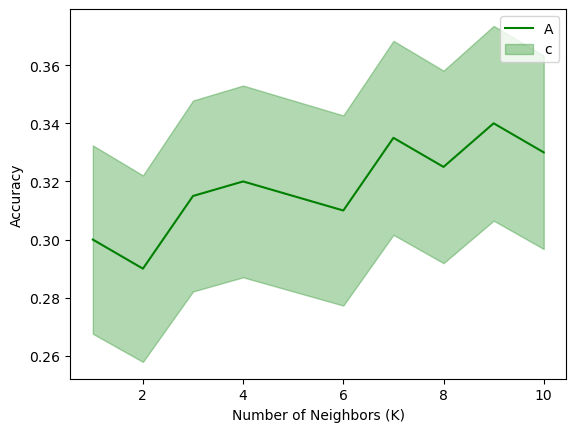

In [15]:
plt.plot(range(1,k), ACC ,'g')
ACC = np.array(ACC)
STD = np.array(STD)
max_range = ACC + STD
min_range = ACC - STD
plt.fill_between(range(1,k), max_range, min_range, color="g", alpha=0.3)
plt.legend(('Accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')

plt.show()

In [18]:
print( "The best accuracy was with", max(list(ACC)), "with k=", ACC.argmax()+1) 

The best accuracy was with 0.34 with k= 9


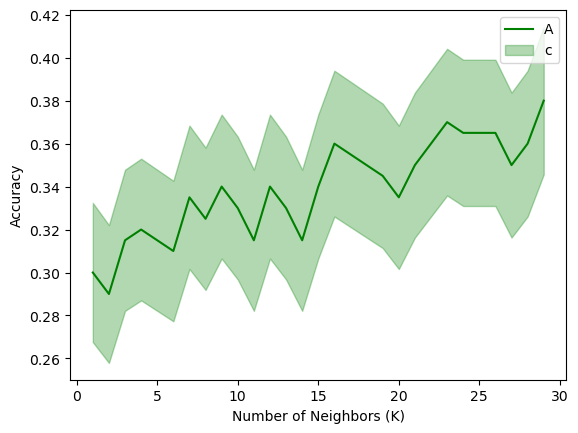

The best accuracy was with 0.38 with k= 29


In [20]:
k=30
ACC=[]
STD=[]

for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train,y_train)

    yhat = neigh.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    ACC.append(acc)
    st = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    STD.append(st)

plt.plot(range(1,k), ACC ,'g')
ACC = np.array(ACC)
STD = np.array(STD)
max_range = ACC + STD
min_range = ACC - STD
plt.fill_between(range(1,k), max_range, min_range, color="g", alpha=0.3)
plt.legend(('Accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')

plt.show()

print( "The best accuracy was with", ACC.max(), "with k=", ACC.argmax()+1) 


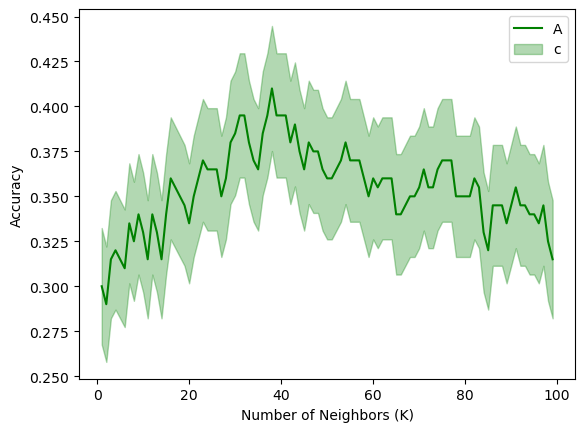

The best accuracy was with 0.41 with k= 38


In [22]:
k=100
ACC=[]
STD=[]

for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train,y_train)

    yhat = neigh.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    ACC.append(acc)
    st = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    STD.append(st)

plt.plot(range(1,k), ACC ,'g')
ACC = np.array(ACC)
STD = np.array(STD)
max_range = ACC + STD
min_range = ACC - STD
plt.fill_between(range(1,k), max_range, min_range, color="g", alpha=0.3)
plt.legend(('Accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')

plt.show()

print( "The best accuracy was with", ACC.max(), "with k=", ACC.argmax()+1) 


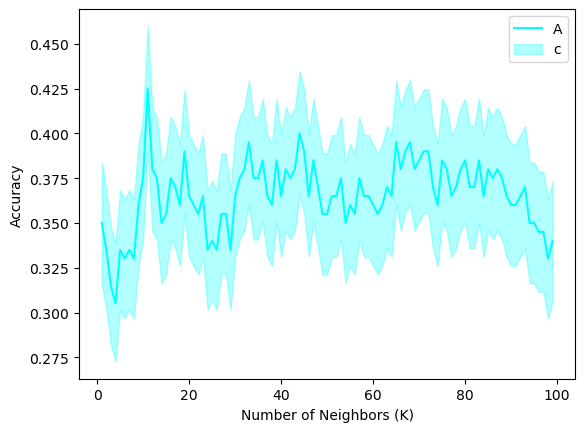

The best accuracy was with 0.425 with k= 11


In [24]:
X1 = df[['tenure', 'marital', 'address', 'income', 'ed', 'employ', 'reside']].astype("float64")
y = df['custcat']

X1 = StandardScaler().fit_transform(X1)
X1_train, X1_test, y_train, y_test = train_test_split( X1, y, test_size=0.2, random_state=4)

k=100
ACC=[]
STD=[]

for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X1_train,y_train)

    yhat = neigh.predict(X1_test)
    acc = accuracy_score(y_test, yhat)
    ACC.append(acc)
    st = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    STD.append(st)

plt.plot(range(1,k), ACC ,'cyan')
ACC = np.array(ACC)
STD = np.array(STD)
max_range = ACC + STD
min_range = ACC - STD
plt.fill_between(range(1,k), max_range, min_range, color="cyan", alpha=0.3)
plt.legend(('Accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')

plt.show()

print( "The best accuracy was with", ACC.max(), "with k=", ACC.argmax()+1) 


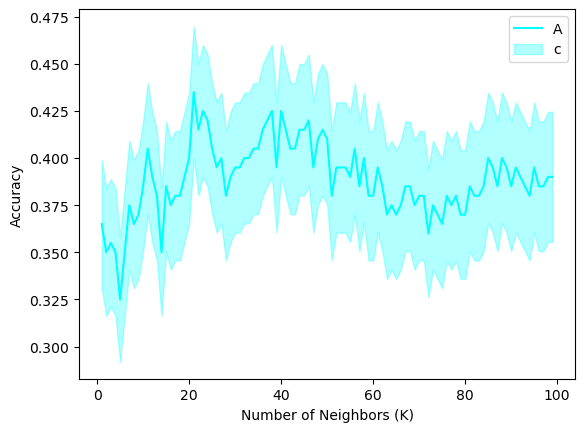

The best accuracy was with 0.435 with k= 21


In [26]:
X2 = df[['income', 'ed']].astype("float64")
y = df['custcat']

X2 = StandardScaler().fit_transform(X2)
X2_train, X2_test, y_train, y_test = train_test_split( X2, y, test_size=0.2, random_state=4)

k=100
ACC=[]
STD=[]

for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X2_train,y_train)

    yhat = neigh.predict(X2_test)
    acc = accuracy_score(y_test, yhat)
    ACC.append(acc)
    st = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    STD.append(st)

plt.plot(range(1,k), ACC ,'cyan')
ACC = np.array(ACC)
STD = np.array(STD)
max_range = ACC + STD
min_range = ACC - STD
plt.fill_between(range(1,k), max_range, min_range, color="cyan", alpha=0.3)
plt.legend(('Accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')

plt.show()

print( "The best accuracy was with", ACC.max(), "with k=", ACC.argmax()+1) 


In [28]:
X = df[['tenure', 'marital', 'address', 'income', 'ed', 'employ', 'reside']].astype("float64")
y = df['custcat']

pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=4)), ('knn', KNeighborsClassifier(n_neighbors=5))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
pipeline.fit(X_train, y_train)

test_score = pipeline.score(X_test, y_test)
print(f"{test_score:.3f}")
y_pred = pipeline.predict(X_test)

0.350


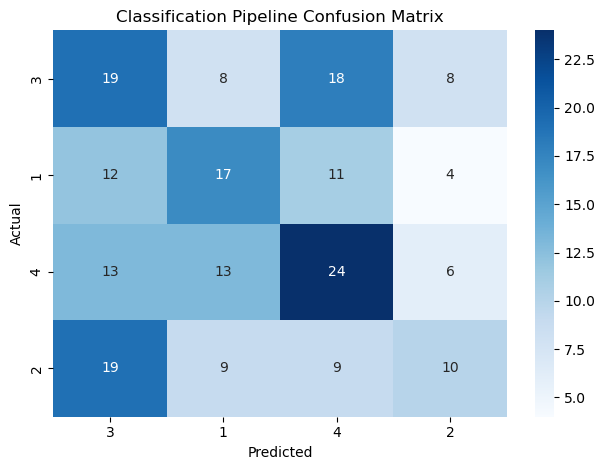

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

plt.title('Classification Pipeline Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [34]:
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('knn', KNeighborsClassifier())])
param_grid = {'pca__n_components': [3, 4, 5], 'knn__n_neighbors': [10, 11, 12]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

In [36]:
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [10, 11, 12],
                         'pca__n_components': [3, 4, 5]},
             scoring='accuracy', verbose=1)

In [37]:
test_score = best_model.score(X_test, y_test)
print(f"{test_score:.3f}")

0.395


In [40]:
best_model.best_params_

{'knn__n_neighbors': 11, 'pca__n_components': 5}

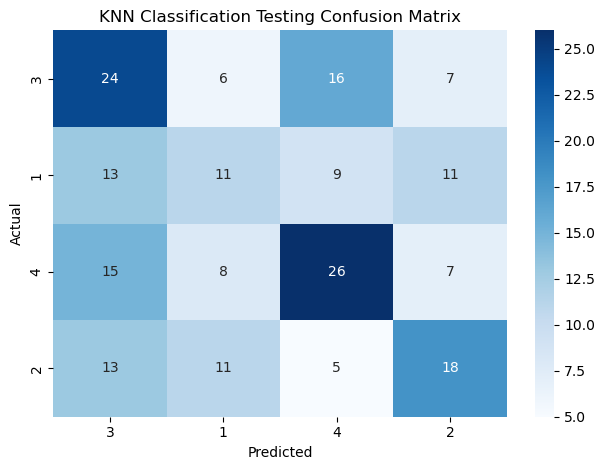

In [42]:
y_pred = best_model.predict(X_test)

# Generate the confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('KNN Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()


In [44]:
from collections import Counter
import numpy as np

# Compute class weights
class_counts = Counter(y)
total_samples = len(y)
num_classes = len(class_counts)

# Calculate individual class weights
class_weights = {cls: total_samples / (num_classes * count) for cls, count in class_counts.items()}
print("Class Weights:", class_weights)

sample_weights = np.array([class_weights[label] for label in y_train])

Class Weights: {1: 0.9398496240601504, 4: 1.0593220338983051, 3: 0.8896797153024911, 2: 1.152073732718894}


In [46]:
from xgboost import XGBClassifier
y = y - y.min()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
pipeline = Pipeline([('scaler', StandardScaler()), ('xgb', XGBClassifier(random_state=42))])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [50, 100, 150, 200],
    'xgb__learning_rate': [0.001, 0.01],
    'xgb__gamma': [0, 0.1, 0.2]}

best_model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)


best_model.fit(X_train, y_train, xgb__sample_weight=sample_weights)
print(f"Test Accuracy: {best_model.score(X_test, y_test):.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Test Accuracy: 0.425


In [47]:
best_model.best_params_

{'xgb__gamma': 0.1,
 'xgb__learning_rate': 0.01,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 150}